#**Actividad de la semana 3**

###**Maestría en Inteligencia Artificial Aplicada**

###**Curso: Inteligencia Artificial y Aprendizaje Automático**

####**Tecnológico de Monterrey**

#####**Prof Luis Eduardo Falcón Morales**

###**Nombre del estudiante: Renzo Antonio Zagni Vestrini**

###**Matrícula: A01795457**

In [119]:
# PARTE 1: Análisis descriptivo y preprocesamiento de los datos:
#
# 1) Incluye una breve introducción sobre lo que se entiende por el problema de
# rotación de personal en las organizaciones (employee attrition problem).
#
# Respuesta:
# ---------
# El problema de rotación de personal puede explicarse a través del impacto que
# genera en las empresas, tanto en términos de pérdida de personal capacitado
# como en la productividad y moral de los equipos, además de los costos
# asociados al reemplazo. Por ejemplo:
#
# 1. Cuando un empleado abandona su puesto, se lleva consigo conocimientos y
# habilidades que afectan la productividad tanto del equipo como de la empresa
# en su conjunto.
#
# 2. La razón principal por la que un empleado deja su puesto suele ser una
# combinación de dos factores: la baja moral, que puede derivarse de problemas
# de relaciónes con otros miembros del equipo, el liderazgo o la cultura
# empresarial (como una cultura tóxica, falta de comunicación, largas horas de
# trabajo o una carga laboral excesiva), y la existencia de oportunidades más
# atractivas en el mercado laboral, como mejores salarios o perspectivas de
# crecimiento profesional. Ambos son indicadores de problemas subyacentes que
# la gerencia debe identificar y abordar.
#
# 3. El proceso de contratación de un empleado de reemplazo conlleva costos
# significativos, tanto en términos de tiempo como de recursos de personal.
# Además, un nuevo empleado generalmente necesita entre 9 y 12 meses para
# alcanzar el nivel de productividad deseado, lo que añade presión adicional a
# los equipos y recursos de la empresa durante ese período de adaptación.
# Por estas razones, es crucial que las empresas monitoreen de cerca las señales ,
# indicios y comportamientos que puedan indicar la posible salida de empleados
# clave, a fin de tomar medidas preventivas y retener el talento necesario para
# el éxito continuo de la organización.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


In [121]:
import os
from google.colab import drive
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# 2) Carga la base de datos y realiza los análisis necesarios para respondera las siguientes preguntas:
hrdata_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [123]:
# Analizamos los atributos de la data...
# Variables Numericas
hrdata_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [124]:
# Variables tipo objecto (Strings)
hrdata_df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [125]:
# Verificamos tipos de datos
hrdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [126]:
hrdata_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [127]:
# a) ¿Cuántas y cuáles de las variables son numéricas?
print("Total de Variables Numericas: " + str(len(hrdata_df.select_dtypes(include=np.number).columns)))
print()
int_dtypes = ['int16', 'int32', 'int64']
float_dtypes = [ 'float16', 'float32', 'float64']
# i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
print("Total de Variables con Numeros Enteros: " + str(len(hrdata_df.select_dtypes(include=int_dtypes).columns)))
print()
print("Lista de variables con Numeros Enteros: ")
print(pd.DataFrame(hrdata_df.select_dtypes(include=int_dtypes).columns).to_string(header=False, index=False))
# ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?)
print()
print("Total de Variables con Numeros Reales : "+ str(len(hrdata_df.select_dtypes(include=float_dtypes).columns)))
#
# Respuestas:
# ----------

Total de Variables Numericas: 26

Total de Variables con Numeros Enteros: 26

Lista de variables con Numeros Enteros: 
                     Age
               DailyRate
        DistanceFromHome
               Education
           EmployeeCount
          EmployeeNumber
 EnvironmentSatisfaction
              HourlyRate
          JobInvolvement
                JobLevel
         JobSatisfaction
           MonthlyIncome
             MonthlyRate
      NumCompaniesWorked
       PercentSalaryHike
       PerformanceRating
RelationshipSatisfaction
           StandardHours
        StockOptionLevel
       TotalWorkingYears
   TrainingTimesLastYear
         WorkLifeBalance
          YearsAtCompany
      YearsInCurrentRole
 YearsSinceLastPromotion
    YearsWithCurrManager

Total de Variables con Numeros Reales : 0


In [128]:
# iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se
# pueden anular del problema? Justifica tu respuesta.
# Respuesta: Se pueden eliminar las variables numericas con valores unicos ya
# que estas no añaden ningun valor a los modelos de prediccion*
# A continuacion identificamos variables numericas con valores unicos
#
# Respuesta:
# ---------
# Determinamos si existent datos nulos
hrdata_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [129]:
# Determinamos las columnas que tenga datos unicos
colunique_df = pd.DataFrame(columns=["Column", "Element", "Data Type"])
for colname in hrdata_df.columns:
  unique_elements = hrdata_df[colname].unique()
  data_type = hrdata_df[colname].dtypes
  cnt = unique_elements.size
  if cnt == 1:
    colunique_df.loc[len(colunique_df)] = {'Column':colname, 'Element': unique_elements[0], 'Data Type': data_type }
colunique_df

,Column,Element,Data Type
0,EmployeeCount,1,int64
1,Over18,Y,object
2,StandardHours,80,int64


In [130]:
# El data frame superior nos muestra que tenemos tres variables que contiene un
# valores unicos. Dos de ellas son numericas : EmployeeCount y StandardHours.
# Ambas columnas pueden ser eliminadas del data frame ya que no proporcionan
# ningun valor estadisto.
# Lo mismo se puede concluir de la variable categorica Over18.
# Por otro lado, debemos asegurarnos que estos valores no cambiaran en el futuro
# de ser asi, estos deberan ser re-analizados para decidir si son importantes
# para los modelos
#
# Ademas de estas tres variables, la variable EmployeeNumber tambien se puede
# eliminar ya que considero que no tiene relevancia predictiva

In [131]:
# b) ¿Cuántas y cuáles de las variables son categóricas?
#
# Respuesta:
# ---------
# Existen 18 variables categoricas y son las siguientes:
#
# Attrition
# BusTravel
# Department
# Education
# EducationField
# EnvironmentSatisfaction
# Gender
# JobInvolvement
# JobLevel
# JobRole
# JobSatisfaction
# MaritalStatus
# Over18
# OverTime
# PerformanceRating
# RelationshipSatisfaction
# StockOptionLevel
# WorkLifeBalance
#

In [132]:
# i. ¿Cuántas y cuáles de estas variables son binarias?
hrdata_df.describe(include=object)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [133]:
#
# Respuesta:
# ---------
# Mediante la observacion de los atributors de las variables podemos determinar
# que existen cuatro variables binarias
# 1) Attrition (Yes/No)
# 2) Gender (Male/Female)
# 3) Over18 (Y/N) . Cabe observar que esta es variable tiene las caracteristicas
#                   de ser una variable binaria aunque solo cuente con un unico
#                   dato.
# 4) Overtime (Yes/No)

In [134]:
# ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
# niveles que tiene cada una de estas variables.
#
# Respuesta:
# ---------
# Existen 9 variables nominales y son las siguientes:
# Nota: Consideramos las variables binarias Attrition, Gender, Over18 y OverTime
# como nominales

hrdata_nom = ['Attrition', 'BusinessTravel', 'Department',
              'EducationField', 'Gender', 'JobRole',
              'MaritalStatus', 'Over18', 'OverTime']
print("Variable".ljust(26) + "Niveles")
print("------------------------- -------")
for colname in hrdata_nom:
  levels = len(hrdata_df[colname].unique())
  print(colname.ljust(28)  + " " + str(levels))

Variable                  Niveles
------------------------- -------
Attrition                    2
BusinessTravel               3
Department                   3
EducationField               6
Gender                       2
JobRole                      9
MaritalStatus                3
Over18                       1
OverTime                     2


In [135]:
# iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles
# que tiene cada una de estas variables.
#
# Respuesta:
# ---------
# Existen 9 variables ordinales y son las siguientes:

hrdata_ord = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
              'JobLevel', 'JobSatisfaction', 'PerformanceRating',
              'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
print("Variable".ljust(26) + "Niveles")
print("------------------------- -------")
for colname in hrdata_ord:
  levels = len(hrdata_df[colname].unique())
  print(colname.ljust(28)  + " " + str(levels))

Variable                  Niveles
------------------------- -------
Education                    5
EnvironmentSatisfaction      4
JobInvolvement               4
JobLevel                     5
JobSatisfaction              4
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
WorkLifeBalance              4


In [136]:
# iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se
# pueden anular del problema? Justifica tu respuesta.
#
# Respuesta:
# ---------
# Considero que la variable categorica Over18 se puede eliminar ya que tiene un
# valor unico 'Y' y no tiene valores nulos. Esta variable no añade ningun valor
# predictivo. Por otra lado, seria importante informar al personal de negocios
# o al analista encargado de esta decision ya que en el futuro la empresa podria
# contratar personal menores de 18 años.

In [137]:
# c) En esta base de datos y con base a la información dada, ¿existe alguna o
# algunas variables cuya clasificación en algún tipo de dato dependa del
# analista? ¿Cuáles y por qué?
#
# Respuesta:
# ---------
# Si, existen varias variables categoricas con tipo de dato numerico cuya
# clasificacion depende del analista. Considero que todas las variable ordinales
# estan bajo la dependencia del analista debido el uso de enteros que no explican
# el significado del valor de la variable , ni el orden de aumento o disminucion
# en el contexto de negocio.
#
print("Variable".ljust(30) + "Valores")
print("---------------------------- -----------")
for colname in hrdata_ord:
  levels = np.sort(hrdata_df[colname].unique())
  print(colname.ljust(28)  + " " + str(levels))

# Por Ejemplo:
# Education: Podría especularse que el nivel 5 es el más alto, equivalente a un
# doctorado, y que el nivel 1 es el más bajo, que podría representar educación
# primaria o secundaria, dependiendo de la decisión del analista.
# En cuanto a EnvironmentSatisfaction, JobInvolvement, JobSatisfaction,
# PerformanceRating, RelationshipSatisfaction y WorkLifeBalance, no es evidente
# el significado de los valores 1 versus 4, así como los valores intermedios.
#
# Con especto a JobLevel y StockOptionLevel, podríamos especular que un nivel 5 es
# el máximo, aunque sin conocer su significado. Sin tener claridad sobre cómo el
# analista diseñó los datos y aplicó los valores, sería arriesgado hacer
# suposiciones. En estos casos, se recomienda contactar al analista para aclarar
# estas dudas.


Variable                      Valores
---------------------------- -----------
Education                    [1 2 3 4 5]
EnvironmentSatisfaction      [1 2 3 4]
JobInvolvement               [1 2 3 4]
JobLevel                     [1 2 3 4 5]
JobSatisfaction              [1 2 3 4]
PerformanceRating            [3 4]
RelationshipSatisfaction     [1 2 3 4]
StockOptionLevel             [0 1 2 3]
WorkLifeBalance              [1 2 3 4]


In [138]:
# d) De existir,elimina del problema todaslas variables que consideraste que no
# están aportando información alguna.
#
# Respuesta:
# Eliminaremos las variables EmployeeCount, Over18 y StandardHours
hrdata_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

In [139]:
# 3) Realiza una partición de los datos en Entrenamiento, Validación y Prueba,
# del 70%, 15%y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval,
# Xtest, ytrain, yval, ytest, para los datos de entrada y de salida,
# respectivamente. Asegúrate que dicha partición conserve la estratificación de
# las clases de la variable “Attrition”.
#
# Respuesta:
# ---------
# Separamos las variables predictoras (X) y la variable de salids (y)
#
X = hrdata_df.loc[:, hrdata_df.columns != 'Attrition']
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [140]:
y = hrdata_df.loc[:, hrdata_df.columns == 'Attrition']
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Attrition  1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [141]:
# Utilizamos la funcion train_test_split de sckit-learn para separar
# primero el grupo de entrenamiento y el de test (70/30). Del conjunto inicial
# de prueba extraemos el grupo final de prueba (test) y el de validacion (val)
# Nota: utilizamos random_state=1 para garantizar reproducibilidad
# Train : 75% del set de datos
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,  stratify=y, random_state=1)
# Test and Validation 50:50 del set de test inicial (15% y 15% del set original)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5,stratify=ytest, random_state=1)



In [142]:
# a) Despliega la dimensión obtenida de los tresconjuntos: Entrenamiento, Validación y Prueba.
print("Xtrain: " + str(Xtrain.shape))
print("ytrain: " + str(ytrain.shape))

print("Xtext: " + str(Xtest.shape))
print("ytest: " + str(ytest.shape))

print("Xval: " + str(Xval.shape))
print("yval: " + str(yval.shape))


Xtrain: (1029, 30)
ytrain: (1029, 1)
Xtext: (221, 30)
ytest: (221, 1)
Xval: (220, 30)
yval: (220, 1)


In [143]:
non_numeric = hrdata_nom + hrdata_ord
for colname in Xtrain.select_dtypes(include=np.number).columns.tolist():
  if colname not in non_numeric:
    print(colname)


Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [144]:
# 4) Usando solamente el conjunto de Entrenamiento , obtener los histogramas de las variables numéricas.
#
# Respuesta:
# ---------
# Las variables numericas no categoricas son las siguientes:
hrdata_non_numeric = hrdata_nom + hrdata_ord
hrdata_numeric = []
for colname in Xtrain.select_dtypes(include=np.number).columns.tolist():
  if colname not in hrdata_non_numeric:
    hrdata_numeric.append(colname)
    print(colname)

Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


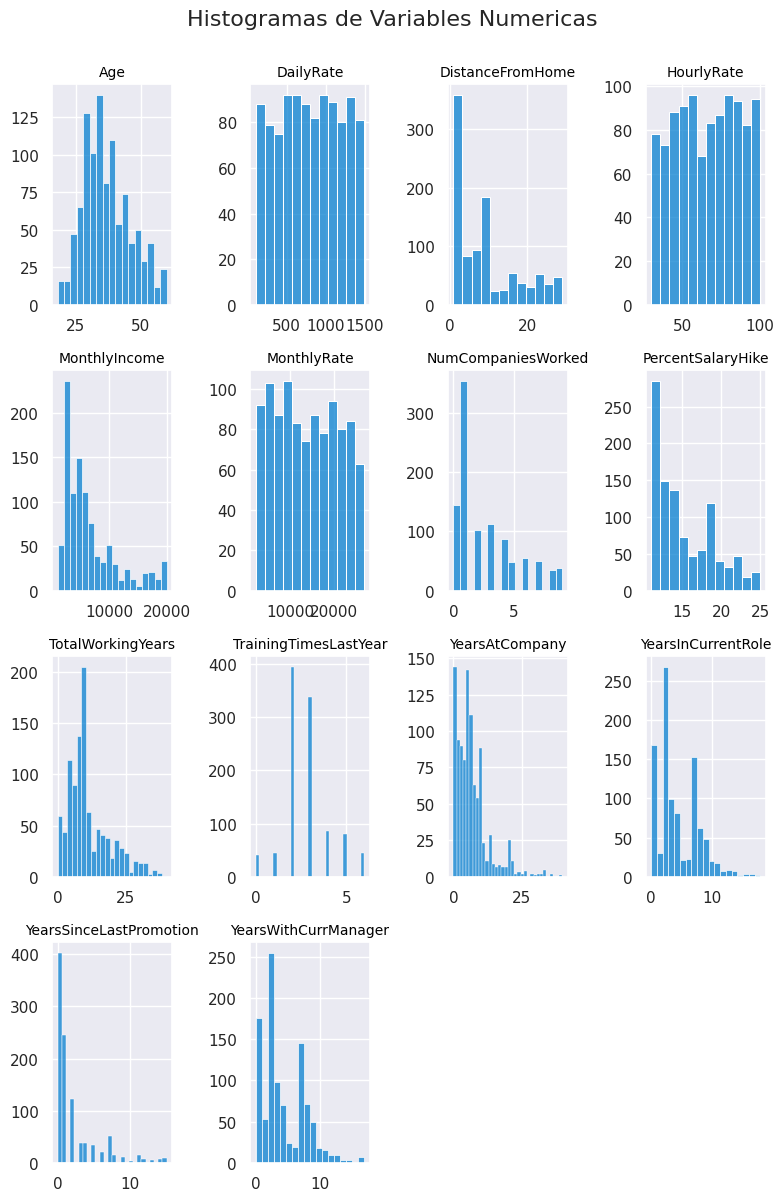

In [145]:
# Generamos los histogramas...

warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)
blue = ["#067FD0"]
sns.set_palette(blue)
fig, axes = plt.subplots(figsize=(8,12))
fig.suptitle("Histogramas de Variables Numericas", fontsize=16, y=1)
col_cnt = 1
skew_cols = []
title_color = 'black'
for colname in hrdata_numeric:
  ax = plt.subplot(4,4, col_cnt)
  ax.set_title(colname , color=title_color, size=10)
  bp = sns.histplot(Xtrain[colname])
  # Decluttering
  bp.set(xlabel=None, ylabel=None)
  col_cnt += 1
plt.tight_layout()


In [146]:
# a) Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a
# cabo en dichas variables?
# i. Aplica las transformaciones que hayas determinado realizar, evitando el
# filtrado de información (data-leakage). A estas nuevas variables transformadas
# llamarlas XtrainT, XvalT y XtestT.
#
# Respuesta:
# ---------
# Primero aplicamos una funcion de escalamiento. Decidi utilizar la funcion
# de escalamiento min max ya que ya que esta se ajusta a las caracteristicas de
# la data

In [147]:
def my_minmax(reference, target):
#
# reference: data set de entrenamiento para calcular mix y max
# target: data set para aplicar escalamiento con los valores min y max
# del conjunto de datos de entrenamiento para evitar data-leakage
#
  min = np.min(reference)
  max = np.max(reference)
  median = np.median(reference)
  return (target - min)/(max - min)

In [148]:
XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()
for colname in hrdata_numeric:
  XtrainT[colname] =  my_minmax(Xtrain[colname], Xtrain[colname])
  XvalT[colname] = my_minmax(Xtrain[colname], Xval[colname])
  XtestT[colname] = my_minmax(Xtrain[colname], Xtest[colname])

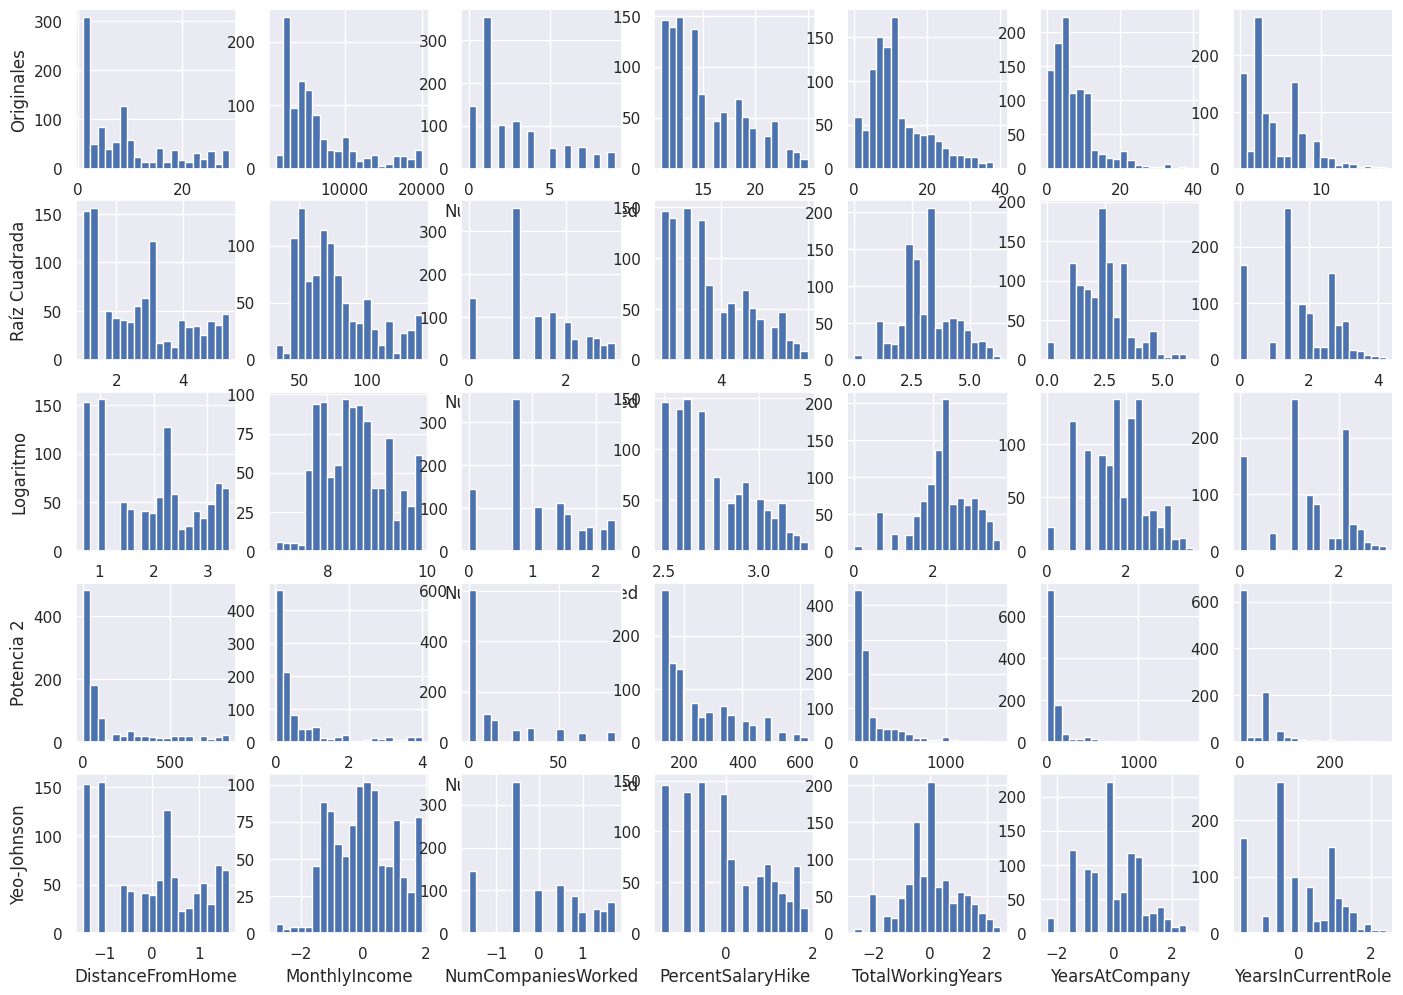

In [149]:
from sklearn.preprocessing import power_transform



variables_a_transformar = ['DistanceFromHome', 'MonthlyIncome','NumCompaniesWorked',
                   'PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
                   'YearsInCurrentRole',  'YearsSinceLastPromotion',
                   'YearsWithCurrManager' ]


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):


    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = Xtrain[variables_a_transformar[k]]
    plt.hist(Transf0, bins=20)


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(Xtrain[variables_a_transformar[k]])
    plt.hist(Transf1, bins=20)


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)

    Transf2 = np.log(Xtrain[variables_a_transformar[k]] + 1)
    plt.hist(Transf2, bins=20)


    plt.xlabel(variables_a_transformar[k] )
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(Xtrain[variables_a_transformar[k]], 2)
    plt.hist(Transf3, bins=20)


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(Xtrain[variables_a_transformar[k]].to_frame(), method='yeo-johnson')
    plt.hist(Transf4, bins=20)


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Yeo-Johnson')

plt.show()

In [150]:
# Data con sesgo positivo ['DistanceFromHome','MonthlyIncome','NumCompaniesWorked'
# ,'PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
# 'YearsSinceLastPromotion','YearsWithCurrManager']
#
# Luego de haber considerado y probado diferentes transformaciones para mejorar
# la distribuion de la data se observa de que para los siguientes datos la transformacion
# de Yeo-Johnson tiene mejor efecto en las variables con sesgo positivo

from sklearn.preprocessing import  PowerTransformer
from sklearn.compose import ColumnTransformer

sesgo_positivo = ['DistanceFromHome', 'MonthlyIncome','NumCompaniesWorked',
                   'PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
                   'YearsInCurrentRole',  'YearsSinceLastPromotion',
                   'YearsWithCurrManager' ]


colTransformer = ColumnTransformer(transformers = [('sesgo+',
                                                    PowerTransformer(),
                                                    sesgo_positivo)],
                                   remainder='passthrough',
                                   verbose_feature_names_out=False )
colTransformer.set_output(transform = 'pandas')

XtrainFit = colTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XtestT = XtrainFit.transform(Xtest)
XvalT = XtrainFit.transform(Xval)

In [151]:
XtrainT.head()

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,...,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
1073,1.648245,0.403790,-0.568827,-0.128188,-0.246915,0.504486,0.688669,0.087037,0.919565,28,...,Manufacturing Director,2,Married,3173,No,3,2,2,2,2
1105,0.247712,0.368153,0.035103,-0.504608,-0.246915,-0.974874,-0.457380,0.599741,-0.408612,33,...,Sales Executive,1,Married,10589,No,3,4,1,6,1
538,-1.468777,1.828902,-0.568827,-0.950679,1.303161,1.863629,0.893521,0.599741,1.420787,41,...,Manager,3,Married,19562,No,3,2,1,3,3
1300,0.247712,0.458490,-0.568827,1.421295,0.052826,0.787528,1.080230,1.102836,1.100598,34,...,Sales Executive,3,Married,22128,No,4,3,2,5,3
1382,-0.682272,-0.792734,-0.568827,-0.504608,-1.038046,-0.301502,-0.457380,0.599741,-0.050189,31,...,Research Scientist,1,Divorced,3995,Yes,3,4,1,3,4


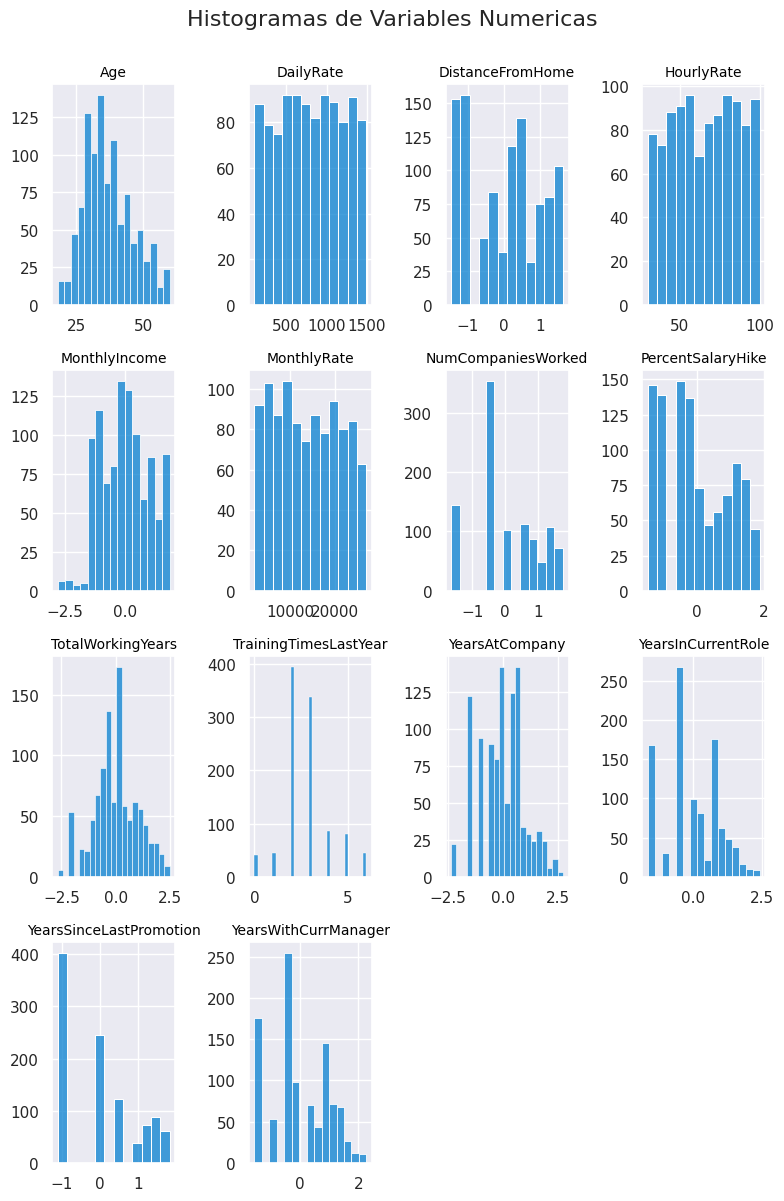

In [152]:
# Validamos la nueva distribucion
blue = ["#067FD0"]
sns.set_palette(blue)
fig, axes = plt.subplots(figsize=(8,12))
fig.suptitle("Histogramas de Variables Numericas", fontsize=16, y=1)
col_cnt = 1
skew_cols = []
title_color = 'black'
for colname in hrdata_numeric:
  ax = plt.subplot(4,4, col_cnt)
  ax.set_title(colname , color=title_color, size=10)
  bp = sns.histplot(XtrainT[colname])
  # Decluttering
  bp.set(xlabel=None, ylabel=None)
  col_cnt += 1
plt.tight_layout()
plt.show()

In [153]:
# 5) Aplica la transformación LabelEncoder() de sklearn a todas las variables
# binarias,  evitando el filtrado de información.
# a) En particular,obtenerla distribución de las clases de la variabled de salida
# “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos
# un problema de datos no balanceados?

from sklearn.preprocessing import LabelEncoder

binary_variables = ['Gender', 'OverTime']

my_label_encoder = LabelEncoder()

for colname in binary_variables:
   trained_encoder = my_label_encoder.fit(XtrainT[colname].unique().tolist())
   XtrainT[colname] = trained_encoder.transform(XtrainT[colname])
   XtestT[colname] = trained_encoder.transform(XtestT[colname])
   XvalT[colname] = trained_encoder.transform(XvalT[colname])

In [154]:
# Aplicamos la encodificacion a las variables de salida
ytrainT = ytrain.copy()
ytestT = ytest.copy()
yvalT = yval.copy()

trained_encoder = my_label_encoder.fit(ytrainT['Attrition'].unique().tolist())
ytrainT['Attrition'] = trained_encoder.transform(ytrainT['Attrition'])
ytestT['Attrition'] = trained_encoder.transform(ytestT['Attrition'])
yvalT['Attrition'] = trained_encoder.transform(yvalT['Attrition'])

In [155]:
total = ytrainT['Attrition'].count()
attrition_yes = ytrainT['Attrition'].value_counts()[1]
attrition_no = ytrainT['Attrition'].value_counts()[0]
print("Distribucion de la variable Attrition")
print("-------------------------------------")
print("Yes : " + str(np.round(attrition_yes/total * 100, 2) )+ "%")
print("No  : " + str(np.round(attrition_no/total * 100, 2) )+ "%")

Distribucion de la variable Attrition
-------------------------------------
Yes : 16.13%
No  : 83.87%


<Axes: >

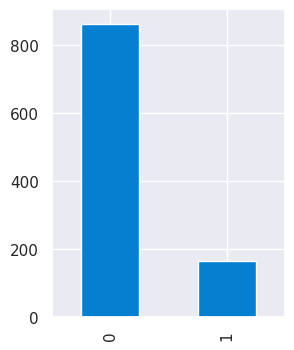

In [156]:
#
# Respuesta:
# ---------
# Basado en los resultados obtenidos (arriba) podemos considerar que tenemos
# un problema de datos desbalanceados
fig, axes = plt.subplots(figsize=(3,4))
ytrainT['Attrition'].value_counts().plot( kind='bar')


In [157]:
# 6) Realiza una inspección de las variables ordinales y determina qué
# transformaciones aplicarles, en caso de aplicar alguna.
# Justifica la decisión que tomes.
#
# Respuesta:
# ---------
# Las variables ordinales se encuentran guardas en la list
# hrdata_ord. Como esta data ya es numerica (enteros) no es
# necesario aplicar metodos de encodificacion
print("Variable".ljust(30) + "Valores")
print("---------------------------- -----------")
for colname in hrdata_ord:
  levels = np.sort(XtrainT[colname].unique())
  print(colname.ljust(28)  + " " + str(levels))

Variable                      Valores
---------------------------- -----------
Education                    [1 2 3 4 5]
EnvironmentSatisfaction      [1 2 3 4]
JobInvolvement               [1 2 3 4]
JobLevel                     [1 2 3 4 5]
JobSatisfaction              [1 2 3 4]
PerformanceRating            [3 4]
RelationshipSatisfaction     [1 2 3 4]
StockOptionLevel             [0 1 2 3]
WorkLifeBalance              [1 2 3 4]


<Axes: >

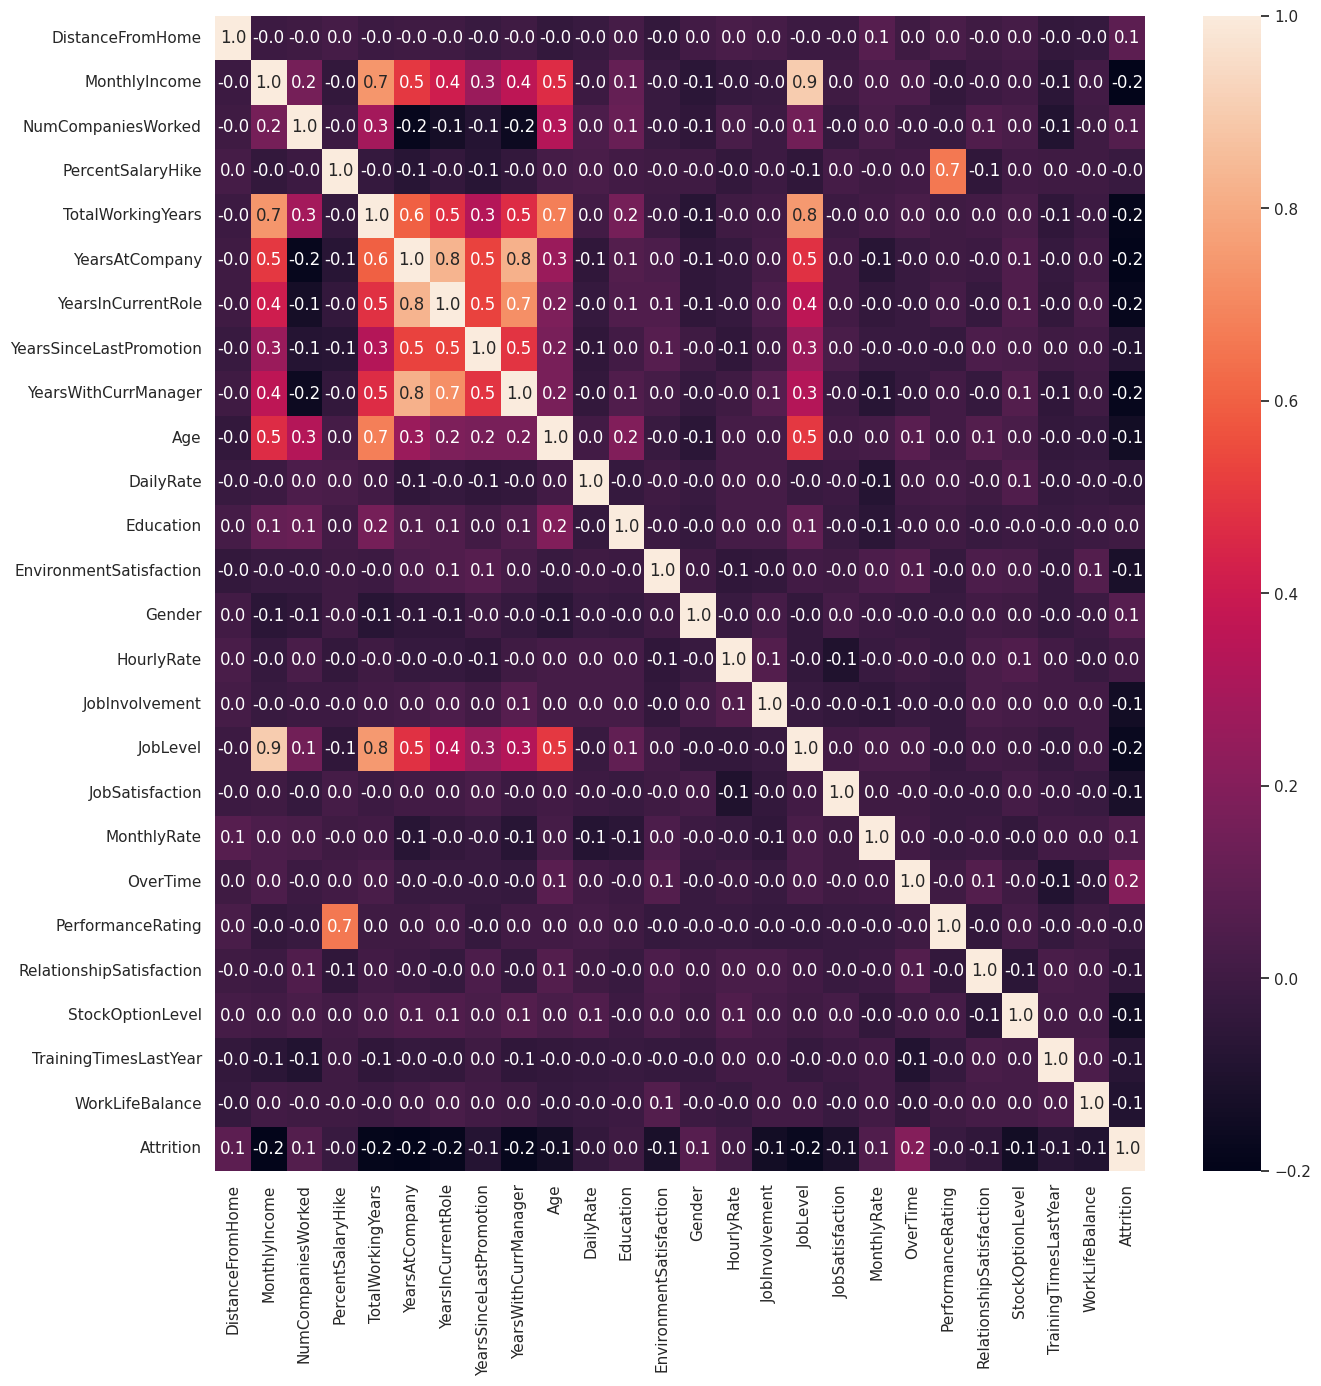

In [158]:
# 7) Obtener la matriz de correlación de los factores obtenidos hasta el momento.
# Debes incluir la variable “Attrition”.

trainingT = pd.merge(XtrainT, ytrainT, left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(round(trainingT.corr(),2), annot = True, fmt=".1f", ax=ax)


In [159]:
# a) Indica las correlaciones positivas “fuertes” entre pares de factores que
# encuentres dentro de la matriz.
#
# Respuestas:
# ----------
# Considerando correlaciones positivas fuertes aquellas iguales o mayores que 0.7
#
# Pares                                     Coeficiente de Correlacion
# ----------------------------------------- --------------------------
# Age y TotalWorkingYears                               0.7
# JobLevel y TotalWorkingYears                          0.8
# JobLevel y MonthlyIncome                              0.9
# MonthlyIncome y TotalWorkingYears                     0.8
# PercentSalaryHike y PerformanceRating                 0.8
# YearsAtTheCompany y YearsinCurrentRole                0.8
# YearsAtTheCompany y YearsWithCurrManager              0.8
# YearsInCurrentRole y YearsWithCurrManager             0.7

In [160]:
# b) Indica las correlaciones negativas “fuertes” entre pares de factores que
# encuentres dentro de la matriz.
# Respuestas:
# ----------
# Considerando correlaciones negativas fuertes aquellas iguales o menores que -0.7
# No se observan correlaciones negativas fuertes dentro de la matriz

In [161]:
#8) Aplica la transformación get_dummies() de Pandas a las variables nominales,
# evitando el filtrado de información y usando el argumento “drop_first” para
# generar “k-1” variables “dummies”, de las “k” que cada variable.
#
# Respuesta:
# Las siguientes son las variables nominales a ser transformadas
# 'BusinessTravel','Department','EducationField','JobRole','MaritalStatus'

In [162]:
Xtrain_nom = XtrainT[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']].copy()
Xtest_nom = XtestT[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']].copy()
Xval_nom = XvalT[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']].copy()

In [163]:
Xtrain_nom_encoded = pd.get_dummies(Xtrain_nom, drop_first=True)
Xtest_nom_encoded = pd.get_dummies(Xtest_nom, drop_first=True)
Xval_nom_encoded = pd.get_dummies(Xval_nom, drop_first=True)

In [164]:
# Asegurarnos de que el orden de las columnas sea el mismo en todos los conjuntos
Xtest_nom_encoded  = Xtest_nom_encoded[Xtrain_nom_encoded.columns]
Xval_nom_encoded = Xval_nom_encoded[Xtrain_nom_encoded.columns]

In [165]:
# Hacemos un merge de los data frames con el dummy encoding a nuestros conjuntos
# de datos predictores transformados
XtrainT = pd.merge(XtrainT, Xtrain_nom_encoded, left_index=True, right_index=True)
XtestT = pd.merge(XtestT, Xtest_nom_encoded, left_index=True, right_index=True)
XvalT = pd.merge(XvalT, Xval_nom_encoded, left_index=True, right_index=True)

In [166]:
# Eliminamos las columnas nominales de los data frames
XtrainT.drop(columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'], inplace=True)
XtestT.drop(columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'], inplace=True)
XvalT.drop(columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'], inplace=True)

In [167]:
# 9) Usa la instrucción XtrainT.head().T, parad esplegar los primeros registros de
# tus datos de entrenamiento con todas las transformaciones realizadas hasta ahora.
# NOTA: Hasta aquí, los nombres de tus variables deben seguir siendo los mismos:
# XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.
XtrainT.head().T

,1073,1105,538,1300,1382
DistanceFromHome,1.648245,0.247712,-1.468777,0.247712,-0.682272
MonthlyIncome,0.403790,0.368153,1.828902,0.458490,-0.792734
NumCompaniesWorked,-0.568827,0.035103,-0.568827,-0.568827,-0.568827
PercentSalaryHike,-0.128188,-0.504608,-0.950679,1.421295,-0.504608
TotalWorkingYears,-0.246915,-0.246915,1.303161,0.052826,-1.038046
YearsAtCompany,0.504486,-0.974874,1.863629,0.787528,-0.301502
YearsInCurrentRole,0.688669,-0.457380,0.893521,1.080230,-0.457380
YearsSinceLastPromotion,0.087037,0.599741,0.599741,1.102836,0.599741
YearsWithCurrManager,0.919565,-0.408612,1.420787,1.100598,-0.050189
Age,28.000000,33.000000,41.000000,34.000000,31.000000


In [168]:
#a) Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.
print("XtrainT: " + str(XtrainT.shape))
print("XtestT: " + str(XtestT.shape))
print("XvalT: " + str(XvalT.shape))

XtrainT: (1029, 44)
XtestT: (221, 44)
XvalT: (220, 44)


In [169]:
# PARTE 2: Análisis exploratorio entre factores
# 10) Se pueden analizar una buena cantidad de factores para buscar relaciones
# entre los factores y la variable de salida “Attrition”, la decisión de dejar
# un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones
# gráficamente y que pueden aportar información al problema que enfrentamos.
# a) Las variables“Age”y“Attrition”.
# b) Las variables “Department”y“Attrition”.
# c) Las variables “Gender” y “Attrition”.
# d) Incluye alguna otra relación o relaciones que consideres relevantes.
# e) Con base a los gráficos obtenidos incluye tus conclusiones al respecto.
# NOTA: Puedes seleccionar el tipo de gráfico que consideres más adecuado.
# En particular te puedes apoyar en la librearía de seaborn.
# A manera de ejemplo puedes ver: https://seaborn.pydata.org/generated/seaborn.countplot.html
#
# Respuesta:
# ---------
# Para este analisis exploratorio entre factores utilizare los conjuntos de
# datos de entrenamiento sin preprocesamiento Xtrain y Ytrain que llamaremos
# hrdata_exp
#
hrdata_exp = pd.merge(Xtrain, ytrain, left_index=True, right_index=True)

In [170]:
ytrainT.head().T

,1073,1105,538,1300,1382
Attrition,0,0,0,0,0


In [171]:
hrdata_exp.head().T

,1073,1105,538,1300,1382
Age,28,33,41,34,31
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel
DailyRate,1083,1242,314,810,976
Department,Research & Development,Sales,Human Resources,Sales,Research & Development
DistanceFromHome,29,8,1,8,3
Education,1,4,3,2,2
EducationField,Life Sciences,Life Sciences,Human Resources,Technical Degree,Medical
EnvironmentSatisfaction,3,1,4,2,3
Gender,Male,Male,Male,Male,Male
HourlyRate,96,46,59,92,48


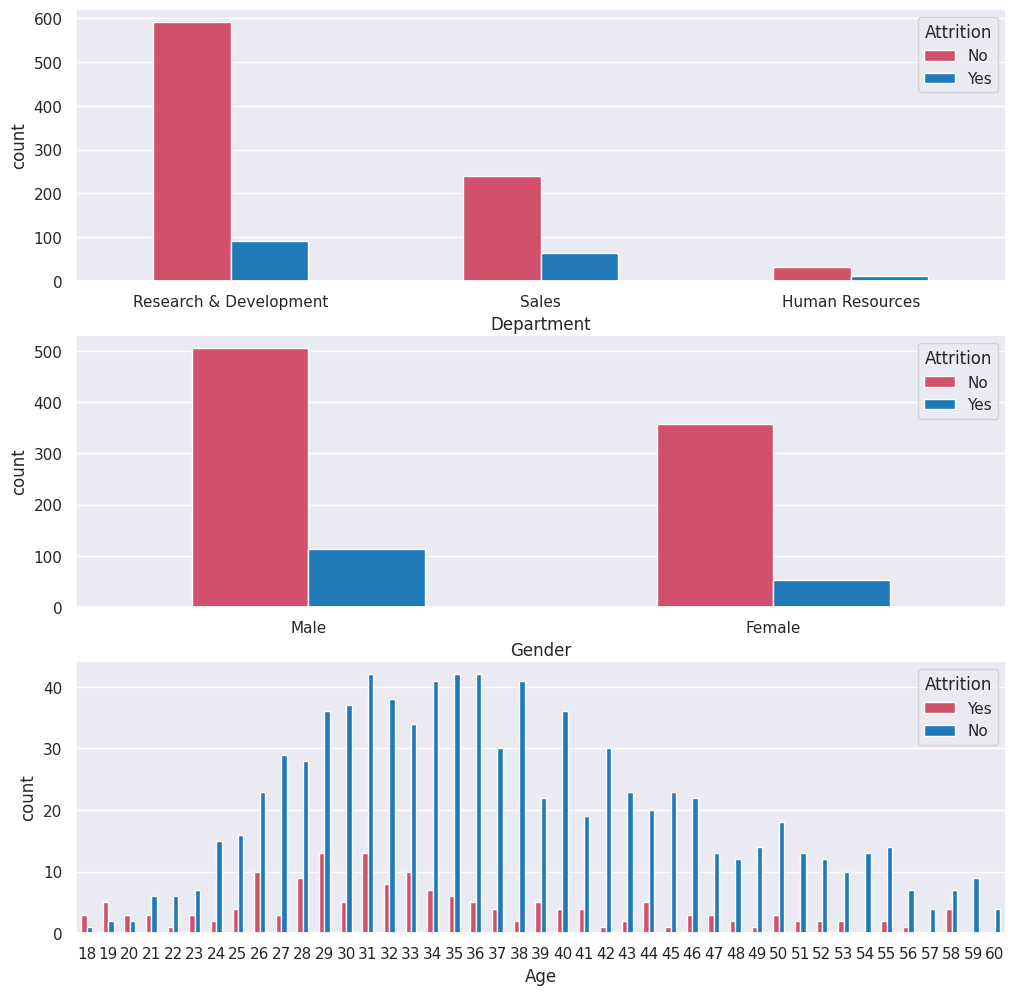

In [172]:
colors = ["#E63B60", "#067FD0"]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(3, figsize=(12, 12))

my_plot1 = sns.countplot(data=hrdata_exp,x="Department", hue="Attrition", width=0.5, ax=ax[0])
my_plot2 = sns.countplot(data=hrdata_exp,x="Gender", hue="Attrition", width=0.5, ax=ax[1])
my_plot3 = sns.countplot(data=hrdata_exp,x="Age", hue="Attrition", width=0.5, ax=ax[2])

plt.show()


In [173]:
#
# De las tres combinaciones mostradas es interesante observar dos particularidades
# 1) No se observar correlacion entre “Gender” y “Attrition” y Department” y
# “Attrition”.
# 2) Por otro lado aunque en el diagrama de correlacion las variables "Age" y
#  “Attrition” no tienen correlacion entre ellas en la grafica countplot superior
# se puede observar como entre las edades de 25 a 35 años los niveles de atricion
# tienen a aumentar y entre 35 y 45 la atricion tiende a disminuir
#
# Otro tipo de grafico interesante es el analisis de las variables que
# mostraron alta correlacion para compararlas con "Attrition"
# TotalWorkingYears, JobLevel, PercentSalaryHike
# YearsAtCompany ,YearsinCurrentRole y YearsWithCurrManager

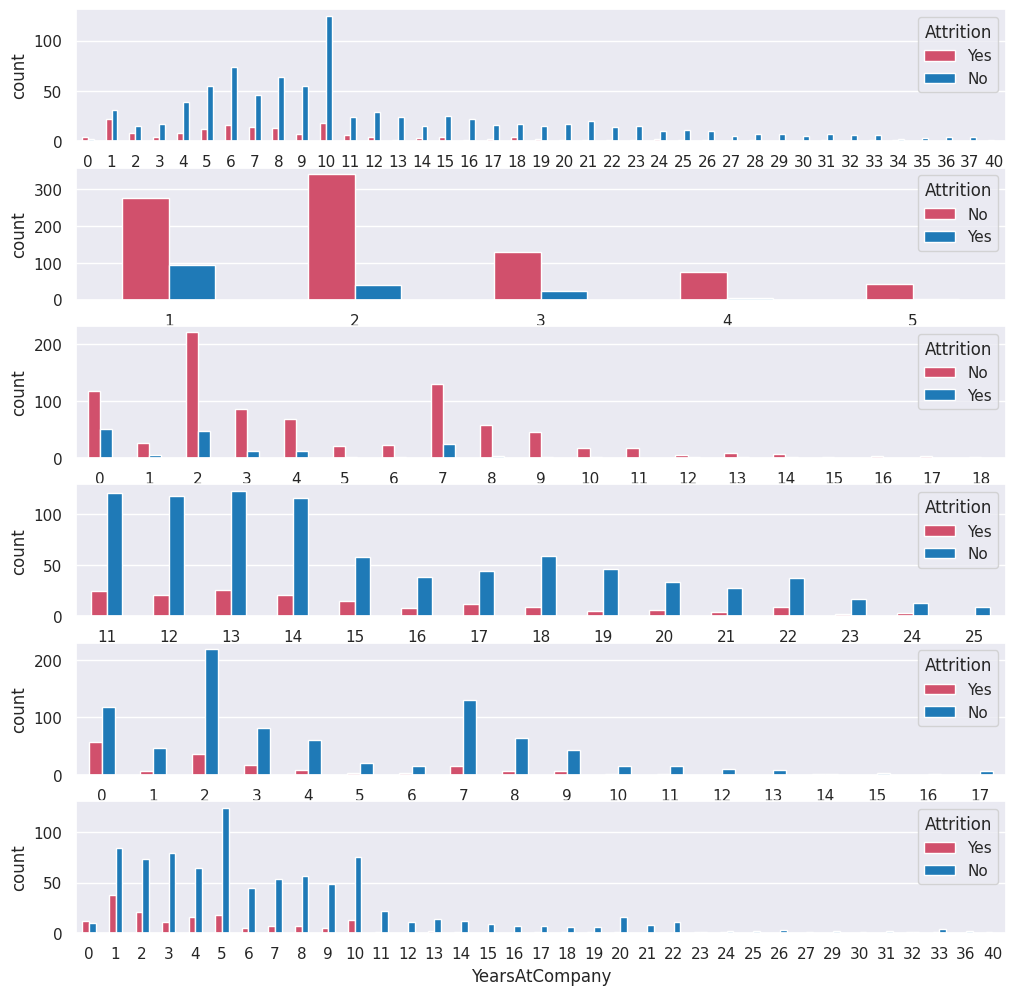

In [174]:
colors = ["#E63B60", "#067FD0"]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(6, figsize=(12, 12))
my_plot1 = sns.countplot(data=hrdata_exp,x="TotalWorkingYears", hue="Attrition", stat='count', width=0.5, ax=ax[0])
my_plot2 = sns.countplot(data=hrdata_exp,x="JobLevel", hue="Attrition", stat='count',width=0.5, ax=ax[1])
my_plot3 = sns.countplot(data=hrdata_exp,x="YearsInCurrentRole", hue="Attrition", stat='count',width=0.5, ax=ax[2])
my_plot4 = sns.countplot(data=hrdata_exp,x="PercentSalaryHike", hue="Attrition", stat='count',width=0.5, ax=ax[3])
my_plot5 = sns.countplot(data=hrdata_exp,x="YearsWithCurrManager", hue="Attrition", stat='count',width=0.5, ax=ax[4])
my_plot6 = sns.countplot(data=hrdata_exp,x="YearsAtCompany", hue="Attrition", stat='count',width=0.5, ax=ax[5])
plt.show()

In [175]:
#
# De estas graficas se puede observar un patron interesante donde los niveles
# mas altos de atricion se observan en los primeros años de empleos (YearsAtCompany
# y TotalWorkingYears). Ademas se puede observar que los empleados en JobLevel = 1
# empleados con menos de una año con su manager (YearsWithCurrManager) y empleados
# que has estados menos de un año en el role (YearsInCurrentRole) muestran los
# niveles mas altos de attricion. Es evidente observar el porque todas estas
# variables estan altamente correlacionadas y la conclucion que podemos obtener
# es que los empleados mas jovenesm, de posiciones de entry level tienden a
# dejar sus puestos probablemente en la busqueda de mejores oportunidades en
# otras compañias

In [176]:
# PARTE 3: Modelado
# 11) Utiliza lo conjuntos de entrenamiento y validación para generar el mejor modelo
# no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.
# a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
# b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
# dado por la función classification_report() de sklearn.

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

modelLR = LogisticRegression()
modelLR.fit(XtrainT, np.ravel(ytrainT))
print(XtrainT.shape)
print(ytrainT.shape)
print(XvalT.shape)
yhat = modelLR.predict(XvalT)

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelLR.score(XtrainT,ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelLR.score(XvalT,yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, yhat))

(1029, 44)
(1029, 1)
(220, 44)
Exactitud del modelo con los datos de entrenamiento: 86.6%
Exactitud del modelo con los datos de validacion: 86.8%

Matriz de Confucion
-------------------
[[183   2]
 [ 27   8]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       185
           1       0.80      0.23      0.36        35

    accuracy                           0.87       220
   macro avg       0.84      0.61      0.64       220
weighted avg       0.86      0.87      0.84       220



In [178]:
# c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
# (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
#
# Respuesta:
# ---------
# Las metricas recall y f1-score estan bastante bajas comparadas con la precision
# y la exactitud . La exactitud de con los datos de entrenamiento y validacion
# es alta y similar. Basado en esto creo que el desbalanceo de la data esta
# afectando el modelo. Este no esta aprendiendo nada sino que se deja influenciar
# por la cantidad de datos de la clase negative. En conclusion el modelo esta sub
# entrenado
#
# d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.
#
# Respuesta:
# ---------
# Definitivamente tenemos un problema desbalanceado. Como mencione en mi respuesta
# a la pregunta anterior la alta diferencia de valores de la clase negativa hace
# que el modelo sea altamante influenciado en sus predicciones y no aprende.
#
# e) Interpreta el valor numérico de la “precision” de la clase positiva.
#
# Respuesta:
# ---------
# La precision del 80% de la clase positiva nos indica que el modelo predice
# correctamente sus resultados positivos en un 80% . En el contexto del problema
# de cada 10 empleados que el modelo predice que renunciaran, 8 lo hacen y 2
# se quedan en la empresa.
#
# f) Interpreta el valor numérico del “recall” de la clase positiva.
#
# Respuesta:
# ---------
# El recall del 23% de la clase positiva nos indica de todos los empleados
# que dejaron la empresa el modelo fue capaz de predecir correctamente
# el 23% de estos
#
# g) Con base al contexto de este problema,de rotación de personal,¿cuál de las
# métricas, “precision” o “recall” consideras que es más importante disminuir
# su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo
# y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más
# cercano a cero? Justifica tu respuesta con base al contexto del problema.
#
# Respuesta:
# ---------
# En terminos de reducir los valores  esto requeriria el el caso de la precision
# aumentar los falsos positivos y en el caso de el recall los falsos negativos.
# El aumento de los falsos negativos seria dañino desde el punto de vista del
# negocio y ya que nos alejaria de la  solucion que estamos buscando. Por otro
# lado el aumento de los falsos positivos,  aunque contra-producente, no seria
# tan impactante por lo que considero que la  metrica que se puede disminuir es
# la precision
#
# Nota: en realidad no considero que ninguna de estas metricas deban disminuirse.
# Se debe considerar un balance entre ellas y sacrificar una por otra
# dependiendo del problema en cuestion


In [179]:
# 12) Utilizalos conjuntos de entrenamiento y validación para generar el mejor
# modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función
# KNeighborsClassifier() de sklearn.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Buscamos hyper parametros optimos
rango = range(3,20,2)
grid = { 'n_neighbors': rango,
        'weights': ['uniform', 'distance'],
         'metric': ['euclid', 'manhattan']}

KNN = KNeighborsClassifier()
modelo_KNN = GridSearchCV(KNN, param_grid=grid, cv=3)
#modelo_KNN.fit(XtrainT,ytrainT)

#print( str(modelo_KNN.best_params_)  +  " " + str(modelo_KNN.best_score_))

In [180]:
for k in range(3,20,2):
  modelo_KNN = KNeighborsClassifier(n_neighbors=k)
  modelo_KNN.fit(XtrainT,np.ravel(ytrainT))
  train = modelo_KNN.score(XtrainT,ytrainT)
  valid = modelo_KNN.score(XvalT,yvalT)
  print("k=" + str(k) + "\tTraining: " + str(train) + " \tValidacion: " + str(valid))

k=3	Training: 0.86977648202138 	Validacion: 0.7954545454545454
k=5	Training: 0.8445092322643343 	Validacion: 0.8409090909090909
k=7	Training: 0.8425655976676385 	Validacion: 0.8363636363636363
k=9	Training: 0.8406219630709426 	Validacion: 0.8409090909090909
k=11	Training: 0.8377065111758989 	Validacion: 0.8363636363636363
k=13	Training: 0.8357628765792031 	Validacion: 0.8363636363636363
k=15	Training: 0.8386783284742468 	Validacion: 0.8363636363636363
k=17	Training: 0.8386783284742468 	Validacion: 0.8409090909090909
k=19	Training: 0.8386783284742468 	Validacion: 0.8409090909090909


In [181]:
# Utizaremos los hyperparametros obtenidos a travez de GridSearchCV
modelo_KNN2 = KNeighborsClassifier(n_neighbors=17, weights='uniform', metric='manhattan')
modelo_KNN2.fit(XtrainT,np.ravel(ytrainT))
print(modelo_KNN.score(XtrainT,ytrainT))
print(modelo_KNN.score(XvalT,yvalT))

0.8386783284742468
0.8409090909090909


In [182]:
yhat = modelo_KNN2.predict(XvalT)

In [183]:
# a) Despliega los valores de la exactitud(accuracy) de los conjuntos de Entrenamiento
# y Validación.
# b) Utilizalos datos de validación para desplegar la matriz de confusión y el
# reporte dado por la función classification_report() de sklearn.

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelo_KNN2.score(XtrainT,ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelo_KNN2.score(XvalT,yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, np.ravel(yhat)))

Exactitud del modelo con los datos de entrenamiento: 83.8%
Exactitud del modelo con los datos de validacion: 84.1%

Matriz de Confucion
-------------------
[[185   0]
 [ 35   0]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        35

    accuracy                           0.84       220
   macro avg       0.42      0.50      0.46       220
weighted avg       0.71      0.84      0.77       220



In [184]:
# c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
# (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
#
# Respuesta:
# ---------
# El modelo esta sobreentrenado
#
# d) Interpreta el valor numérico de la “precision” dela clase positiva.
# e) Interpreta e lvalor numérico del “recall” de la clasepositiva.
#
# Ambos valores son cero. Intente cambiando el hyperparametro n_neighborgs
# a 7 y 9 que fueron los mejores valores obtenidos iterativamente y cambiando
# la metric de manhattan a default sin obtener mejores resultados.


In [185]:
# f) Compara los resultados con los del modelo de Regresión Logística y escribe
# tus conclusiones.
# Repuesta:
# --------
# El modelo de regresion logistica, aunque no es perfecto , es el mas adecuado
# para el problema que estamos tratando de resolver.

In [186]:
# PARTE 4: Balanceo de Clases
# 13) Utiliza el argumento “class_weight” de la función LogisticRegression()
# de sklearn y los valores de los hiperparámetros que consideres más adecuados
# para obtener un modelo no sobreentrenado.
# a) Despliega los valores de la exactitud(accuracy) de los conjuntos de
# Entrenamiento y Validación.
# b) Utiliza los datos de validación para desplegar la matriz deconfusión y el
# reporte dado por la función classification_report() de sklearn.
modelLRW = LogisticRegression(class_weight={0:0.15, 1:0.85})
modelLRW.fit(XtrainT, np.ravel(ytrainT))

yhat = modelLRW.predict(XvalT)

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelLRW.score(XtrainT,ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelLRW.score(XvalT,yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, yhat))

Exactitud del modelo con los datos de entrenamiento: 72.7%
Exactitud del modelo con los datos de validacion: 69.1%

Matriz de Confucion
-------------------
[[125  60]
 [  8  27]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       185
           1       0.31      0.77      0.44        35

    accuracy                           0.69       220
   macro avg       0.63      0.72      0.61       220
weighted avg       0.84      0.69      0.73       220



In [187]:
# c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.
#
# Respuesta:
# ---------
# El balanceo de las clases en el modelo de regression logistica tuvo un impacto
# positivo en su abilidad de predecir con major exactitud los verdaderos positivos
# asi como su dismunicion del numero de falsos negativos i.e. aumento del recall
# que es una metrica que consideramos importante en el contexto del problema

In [188]:
# 14) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de
# los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.
# a) Despliega los valores de la exactitud(accuracy) de los conjuntos de Entrenamiento
# y Validación.
# b) Utiliza los datos de validación para desplegar la matriz de confusión y el
# reporte dado por la función classification_report() de sklearn.

from imblearn.over_sampling import SMOTE

smote = SMOTE()

XtrainSMOTE, ytrainSMOTE = smote.fit_resample(XtrainT, ytrainT)

modelSMOTE = LogisticRegression()
modelSMOTE.fit(XtrainSMOTE, np.ravel(ytrainSMOTE))

yhatSMOTE = modelSMOTE.predict(XvalT)

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelSMOTE.score(XtrainT,ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelSMOTE.score(XvalT,yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, yhat))

Exactitud del modelo con los datos de entrenamiento: 78.4%
Exactitud del modelo con los datos de validacion: 71.4%

Matriz de Confucion
-------------------
[[125  60]
 [  8  27]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       185
           1       0.31      0.77      0.44        35

    accuracy                           0.69       220
   macro avg       0.63      0.72      0.61       220
weighted avg       0.84      0.69      0.73       220



In [189]:
# c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.
#
# Respuesta:
# ---------
# La implementacion de la tecnica SMOTE de over-sampling significo una mejora
# al modelo de regresion logistica al aumentar el recall de 23 a 46% . Aunque
# esta mejoria es positiva no se compara a los efectos obtenidos mediante la
# utilizacion de balanceo de clases que comparada con los otros metodos utilizados
# es la que mejor resultados nos da en el contexto del problema
# Por otro lado la exactitud de la variable de validacion es un tanto menor
# que la de entrenamiento por lo que podemos estar evidenciando un caso de
# sobreentrenamiento

In [190]:
# 15) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y
# reporta los resultados del mejor modelo que hayas obtenido.
# Compáralo con los anteriores e incluye tus conclusiones.
# NOTA: https://imbalanced-learn.org/stable/references/combine.html
#

from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek()

XtrainST, ytrainST = smotetomek.fit_resample(XtrainT, np.ravel(ytrainT))

modelSMT = LogisticRegression()
modelSMT.fit(XtrainST,np.ravel(ytrainST))

yhat = modelSMT.predict(XvalT)

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelSMT.score(XtrainT,ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelSMT.score(XvalT,yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, yhat))

Exactitud del modelo con los datos de entrenamiento: 74.6%
Exactitud del modelo con los datos de validacion: 70.0%

Matriz de Confucion
-------------------
[[139  46]
 [ 20  15]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       185
           1       0.25      0.43      0.31        35

    accuracy                           0.70       220
   macro avg       0.56      0.59      0.56       220
weighted avg       0.77      0.70      0.73       220



In [191]:
# Respuesta:
# ---------
# El modelo muestra un mejor desempeño al  modelo donde utilizamos SMOTE over-sampling
# unicamenta con un accuracy del 75% comparado con 72.3% La metrica que consideramos
# mas importante, el recall, aumenta en 11% pero sigue siendo baja.  Tambien
# observamos aumentos en la  precision y el f1-score indicando una vez mas
# mejoria en el modelo predictivo comparado con SMOTE.
# Por otro lado la exactitud de la variable de validacion es un tanto menor
# que la de entrenamiento por lo que podemos estar evidenciando un caso de
# sobreentrenamiento
#
# En conclucion, la regresion logistica con balanceo de clases utilizando
# pesos (class_weight) es el que nos da mejores resultados en terminos de accuracy
# y recall

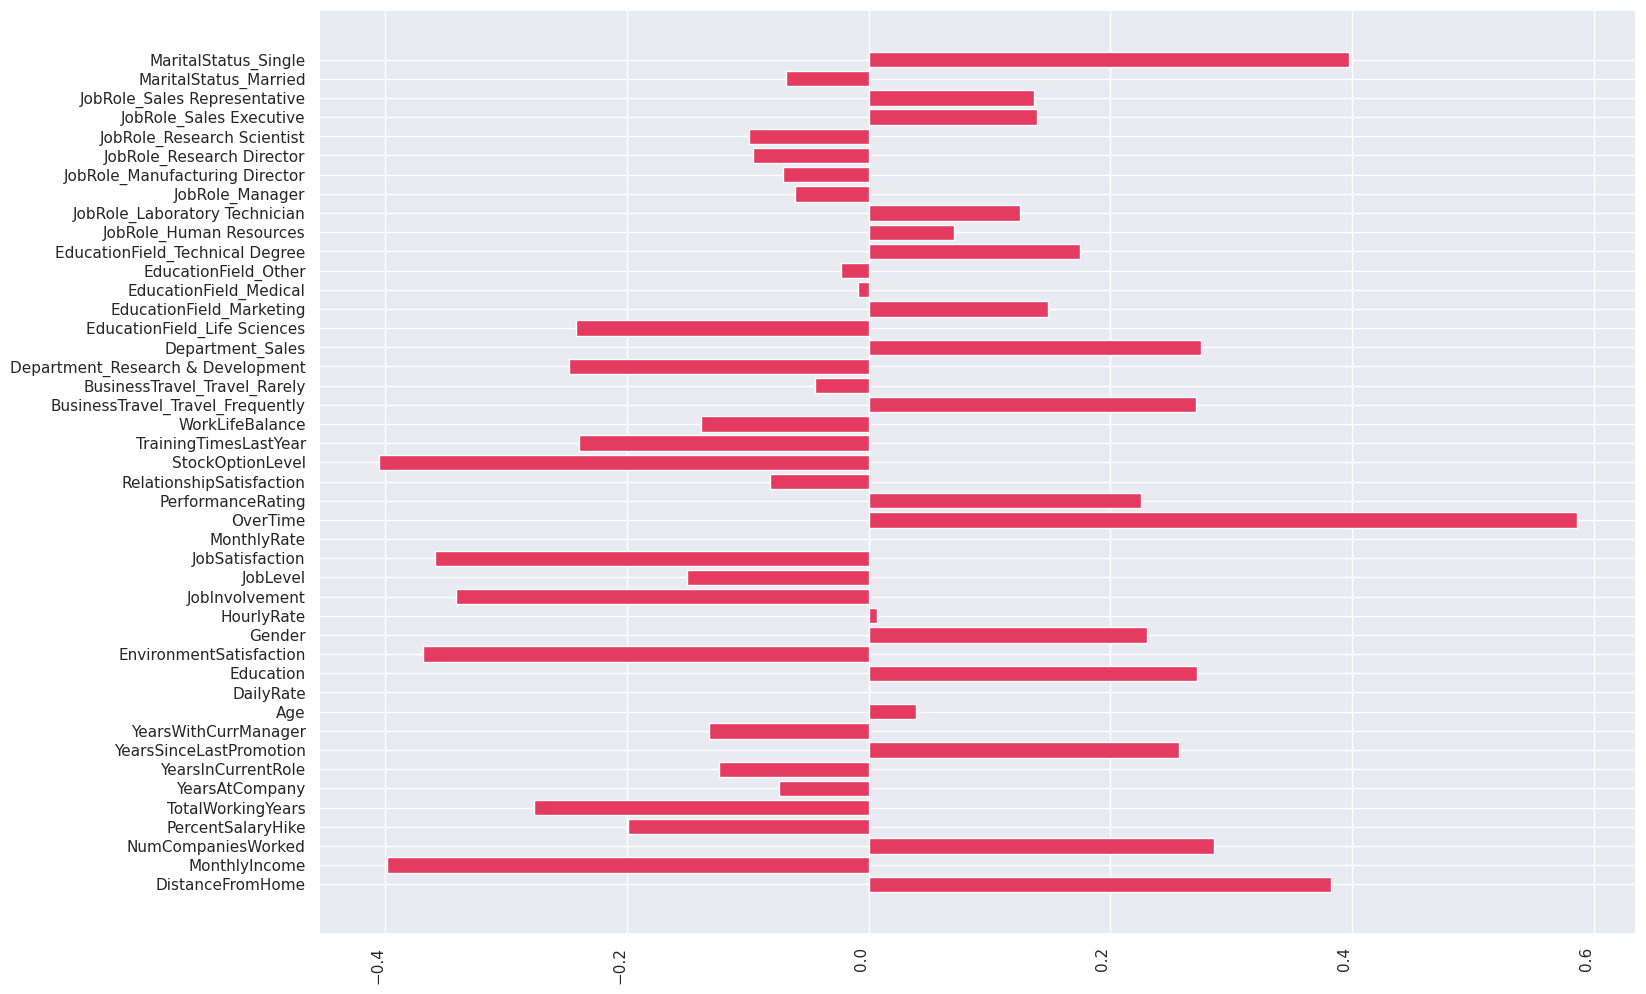

In [192]:
# PARTE 5: La importancia de los factores
# 16) Con base al mejor modelo de regresión logística obtenido hasta ahora,
# utiliza la magnitud de los coeficientes como métrica para identificar aquellos
# factores que se consideran los más importantes al problema de rotación de personal.
# a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada
# factor asociado a cada barra (bin).
#LogisticRegression(class_weight={0:0.15, 1:0.85})
importance = modelLRW.coef_[0]

fc_df = pd.DataFrame(columns=['ID', 'Feature', 'Coeficient'])
for i,v in enumerate(importance):
  fc_df.loc[len(fc_df.index)] = [i, modelLRW.feature_names_in_[i], v]

fig, ax = plt.subplots()
ax.barh(fc_df['Feature'],fc_df['Coeficient'])
plt.xticks(rotation=90, ha='right')
plt.show()

In [193]:
# b) ¿Cuáles factores consideras que son los que influyen mayormente en que un empleado abandone su trabajo (attrition)?
#
# Respuesta:
# ---------
# Los factores con coeficientes majores a 0.15 tienen influyen en que un empleado abandone su trabajo
# Entre esto los influyen majormente so DistanceFromHome, PerformanceRating, Overtime, NumCompaniesWorked y Age
fc_df[(fc_df['Coeficient'] > 0.15)]


,ID,Feature,Coeficient
0,0,DistanceFromHome,0.382678
2,2,NumCompaniesWorked,0.285509
7,7,YearsSinceLastPromotion,0.256966
11,11,Education,0.271732
13,13,Gender,0.230386
19,19,OverTime,0.585840
20,20,PerformanceRating,0.225517
25,25,BusinessTravel_Travel_Frequently,0.271073
28,28,Department_Sales,0.274973
33,33,EducationField_Technical Degree,0.174611


In [194]:
#c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
# empleado no abandone su trabajo (not attrition)?
# Respuesta:
# ---------
# Los factores con coeficientes menores que -0.2 influenyen mayormente a que
# un empleado no abandone su trabajo
fc_df[(fc_df['Coeficient'] < -0.2)]

,ID,Feature,Coeficient
1,1,MonthlyIncome,-0.398533
4,4,TotalWorkingYears,-0.276765
12,12,EnvironmentSatisfaction,-0.368616
15,15,JobInvolvement,-0.341357
17,17,JobSatisfaction,-0.358930
22,22,StockOptionLevel,-0.405378
23,23,TrainingTimesLastYear,-0.239475
27,27,Department_Research & Development,-0.247717
29,29,EducationField_Life Sciences,-0.242615


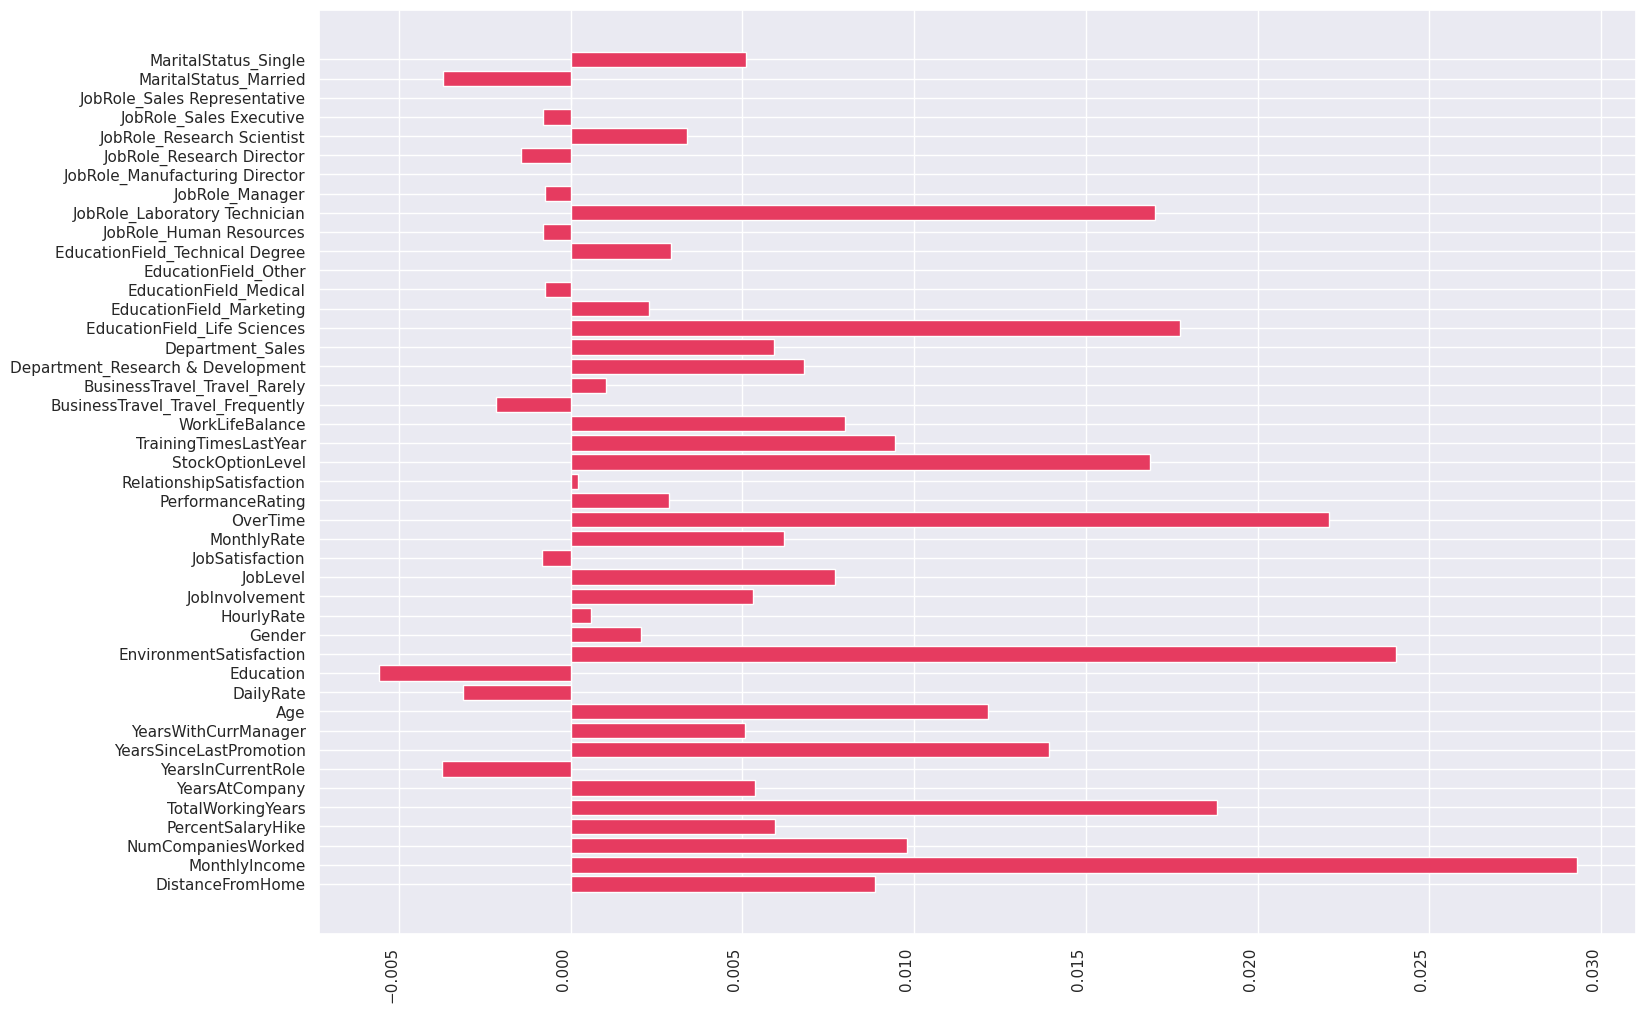

In [195]:
# 17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN
#, aplica la técnica de permutación de los factores con el método “permutation_importance()”
# de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos
# factores que se consideran los más importantes al problema de rotación de personal.
# a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor
# asociado a cada barra (bin).#

from sklearn.inspection import permutation_importance

resultados = permutation_importance(modelLRW, XvalT, yvalT, scoring='f1_weighted')
importance = resultados.importances_mean

fc_df2 = pd.DataFrame(columns=['Feature', 'Coeficient'])

for i,v in enumerate(importance):
  fc_df2.loc[len(fc_df2.index)] = [ modelLRW.feature_names_in_[i], v]

fig, ax = plt.subplots()
ax.barh(fc_df2['Feature'],fc_df2['Coeficient'])
plt.xticks(rotation=90, ha='right')
plt.show()


In [196]:
# b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?
#
# Respuesta:
# ---------
# Los factores con coeficientes majores a 0.0075
fc_df2[(fc_df2['Coeficient'] > 0.0075)]

,Feature,Coeficient
0,DistanceFromHome,0.008859
1,MonthlyIncome,0.029285
2,NumCompaniesWorked,0.009781
4,TotalWorkingYears,0.018817
7,YearsSinceLastPromotion,0.013929
9,Age,0.012148
12,EnvironmentSatisfaction,0.024041
16,JobLevel,0.007693
19,OverTime,0.022080
22,StockOptionLevel,0.016862


In [197]:
#c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
# empleado no abandone su trabajo (not attrition)?
# Respuesta:
# ---------
# Los factores con coeficientes menores que -0.001 influenyen mayormente a que
# un empleado no abandone su trabajo
fc_df2[(fc_df2['Coeficient'] < -0.001)]

,Feature,Coeficient
6,YearsInCurrentRole,-0.003749
10,DailyRate,-0.003126
11,Education,-0.005586
25,BusinessTravel_Travel_Frequently,-0.002187
38,JobRole_Research Director,-0.001443
42,MaritalStatus_Married,-0.003707


In [198]:
# d) Compara los resultados con el ejercicio anterior e incluye tus comentarios.
# En particular, comenta cuál método te da los mejores factores que tienen mayor
# impacto en el problema de rotación de personal.
print("Resultados utilizando la magnitud de los coeficientes")
print(fc_df[(fc_df['Coeficient'] > 0.15)])
print()
print("Resultados utilizando tecnica de permutacion")
print(fc_df2[(fc_df2['Coeficient'] > 0.0075)])

Resultados utilizando la magnitud de los coeficientes
    ID                           Feature  Coeficient
0    0                  DistanceFromHome    0.382678
2    2                NumCompaniesWorked    0.285509
7    7           YearsSinceLastPromotion    0.256966
11  11                         Education    0.271732
13  13                            Gender    0.230386
19  19                          OverTime    0.585840
20  20                 PerformanceRating    0.225517
25  25  BusinessTravel_Travel_Frequently    0.271073
28  28                  Department_Sales    0.274973
33  33   EducationField_Technical Degree    0.174611
43  43              MaritalStatus_Single    0.397268

Resultados utilizando tecnica de permutacion
                          Feature  Coeficient
0                DistanceFromHome    0.008859
1                   MonthlyIncome    0.029285
2              NumCompaniesWorked    0.009781
4               TotalWorkingYears    0.018817
7         YearsSinceLastPromotion 

In [199]:
# Respuesta
# ---------
# El uso de la tecnica de permutacion nos retorna una gran cantidad de
# coeficientes positivos y relativamente altos aunque los 9 factores
# con los coeficientes mas altos tienen sentido del punto de vista
# del problema. Por otro lado esta tecnica no parece darle mucho peso
# a los factores que afectan la clase negativa.
# Con tecnica de la magnitud de los coeficientes se obtienen resultados
# mas balanceado entra la clase positiva y la negativa por lo que esta tiene
# una ventaja sobre la tecnica de permutacion


In [200]:
# 18) Con base al mejor modelo que hayas obtenido hasta ahora entre regresión logística
# y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior,
# utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores
# del problema y volver a entrenar el modelo con los datos de entrenamiento y validación,
# de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente
# la obtenida previamente con todos los factores. Recuerda evitar el filtrado de
# información del conjunto de entrenamiento a los conjuntos de validación y de prueba.
from sklearn.feature_selection import SelectFromModel
max_f = 11

fs = SelectFromModel(estimator=LogisticRegression(class_weight={0:0.15, 1:0.85}), max_features=max_f)
fs.fit(XtrainT, np.ravel(ytrainT))
factor_select = fs.get_support()
# a) ¿A cuántos factores pudiste reducir el problema ? Indica uántos tenías y a
# cuántos se redujo, así como el porcentaje de reducción de factores.

cnt_orig = len(factor_select)
cnt_reduced = sum(bool(x) for x in factor_select)
perc_reduction = round((cnt_orig - cnt_reduced) / cnt_orig,2) * 100
print("Numero de factores originales          : " + str(cnt_orig))
print("Numero de final de factores (reducion) : " + str(cnt_reduced))
print("Porcentage de reduccion                : " + str(perc_reduction) + "%")

Numero de factores originales          : 44
Numero de final de factores (reducion) : 11
Porcentage de reduccion                : 75.0%


In [201]:
XtrainT_fs = pd.DataFrame(XtrainT).columns[factor_select]
XvalT_fs = pd.DataFrame(XvalT).columns[factor_select]

In [202]:
# b) Despliega l amatriz de confusión y el reporte dado por lafunción classification_report().
modelLR = LogisticRegression(class_weight={0:0.15, 1:0.85})
modelLR.fit(XtrainT[XtrainT_fs], np.ravel(ytrainT))

yhat = modelLR.predict(XvalT[XvalT_fs])

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelLR.score(XtrainT[XtrainT_fs],ytrainT)))
print('Exactitud del modelo con los datos de validacion: %.1f%%' % (100*modelLR.score(XvalT[XvalT_fs],yvalT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(yvalT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(yvalT, yhat))

Exactitud del modelo con los datos de entrenamiento: 72.9%
Exactitud del modelo con los datos de validacion: 69.5%

Matriz de Confucion
-------------------
[[124  61]
 [  6  29]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.95      0.67      0.79       185
           1       0.32      0.83      0.46        35

    accuracy                           0.70       220
   macro avg       0.64      0.75      0.63       220
weighted avg       0.85      0.70      0.74       220



In [203]:
# 19) Finalmente,con base a todos los resultados obtenidos hasta ahora,responde a los
# siguientes incisos para obtener el que consideres el mejor modelo para enfrentar
# el problema de rotación de personal a partir de los datos históricos iniciales.

In [204]:
# a) Forma un nuevo conjunto de Entrenamiento con lo mejores conjuntos de entrenamiento
# y validación que hayas obtenido hasta ahora.

XtrainTnew = pd.concat([XtrainT, XvalT])
ytrainTnew = pd.concat([ytrainT, yvalT])

In [205]:
# b) Selecciona el mejor modelo d eaprendizaje automático que hayas obtenido hasta
# ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.
#
# Respuesta:
# ---------
# El mejor modelo de aprendizaje automatico que he consigo es el modelo de regression
# logistica utilizando class weights y reduciendo los factores utilizando la
# magnitud de los coeficientes con max_features = 11. Este nos ofrece un alto
# recall, que si bien nos causa una reduccion de la precision , esta es aceptable
# ya que nos permite determinar con mejor exactitud los verdaderos negativos
# a la vez que reduce significativamente los falsos positivos que es el
# objetivo principal que buscamos en nuestro modelo
# Por otra lado cabe acotar, que el uso de de la reduccion de factores influencio
# positivamente al desenpeños de la regresion logistica con class weights en terminos
# de precision, recall y exactitud

In [206]:
# c) Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el
# conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo. Para ello:
# i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de
# Prueba para verificar que no esté sub o sobre entrenado.
max_f = 11

fs_new = SelectFromModel(estimator=LogisticRegression(class_weight={0:0.15, 1:0.85}), max_features=max_f)

fs_new.fit(XtrainTnew, np.ravel(ytrainTnew))

factor_select_new = fs_new.get_support()

XtrainTnew_fs = pd.DataFrame(XtrainTnew).columns[factor_select_new]
XtestTnew_fs = pd.DataFrame(XtestT).columns[factor_select_new]

modelLRnew = LogisticRegression(class_weight={0:0.15, 1:0.85})
modelLRnew.fit(XtrainTnew[XtrainTnew_fs], np.ravel(ytrainTnew))

yhat = modelLRnew.predict(XtestT[XtestTnew_fs])


In [207]:
# ii. Despliega la matriz de confusión y el reporte dado por la función classification_report()
# del conjunto de Prueba.

print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelLRnew.score(XtrainTnew[XtrainTnew_fs],ytrainTnew)))
print('Exactitud del modelo con los datos de prueba: %.1f%%' % (100*modelLRnew.score(XtestT[XtestTnew_fs],ytestT)))
print()
print("Matriz de Confucion")
print("-------------------")
cm = confusion_matrix(ytestT, yhat)
print(cm)
print()
print("Classification Report")
print("---------------------")
print(classification_report(ytestT, yhat))

Exactitud del modelo con los datos de entrenamiento: 72.8%
Exactitud del modelo con los datos de prueba: 68.3%

Matriz de Confucion
-------------------
[[124  61]
 [  9  27]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       185
           1       0.31      0.75      0.44        36

    accuracy                           0.68       221
   macro avg       0.62      0.71      0.61       221
weighted avg       0.83      0.68      0.72       221



In [208]:
# iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica
# con base al problema de rotación de personal, los resultados obtenidos para las métricas
# “precision”, “recall” y “f1-score”.
#
# Respuesta:
# ---------
# Basado en los resultados obtenidos podemos concluir que el problema de atricion
# de la empresa que proposiono los datos entiendo que este se enfoca en tres categorias:
#
# 1) Los niveles de compensacion
# 2) La cronologia profesional y personal del empleado
# 3) La satisfaccion del empleado
#
# El modelo obtenido a travez de regression logaritmica con la utilizacion de
# peso de clases y reduciendo los factores nos prove los mejores resultados
# comparados con los otros modelos evaluados.
#
# Este experimenta un pequeña reduccion de 4.5% que podria reflejar un poco de
# sobre entrenamiento . Por otro lado el modelo experimenta un reduccion del
# recall sin mayor impacto a la precision lo que soporta la hipotesis del
# algo de sobreentrenamiento del modelo.
#
# Evaluando cada una de las metricas:
# ----------------------------------
# Precision: 31%
# =========
# Esto indica que de todos los casos identificados como positivos por el modelo,
# sólo el 30% son realmente positivos. En el contexto del problema
# de cada 10 empleados que el modelo predice que renunciaran, 3 lo hacen y 7
# no.
# Recall: 78%
# ======
# Esto sugiere que el modelo identifica correctamente el 78% de todos los casos
# positivos reales en el conjunto de datos. En otras palabras de cada 10 empleados
# que dejaron la empresa, el modelo fue capaz de identicar correctamente a ~8.
# F1_score: 44%
# ========
# Indica que el modelo logra un  equilibrio moderado entre precisión y recall.